In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [4]:
DIRECTORY = '/content/drive/MyDrive/dataset'
# a raw string(r'...') is used to treat backslash(\) as a normal character
CATEGORIES = ['mammooty','mohanlal']
num_classes = len(CATEGORIES)

In [5]:
IMG_SIZE = 224

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        label = CATEGORIES.index(category)
        #print(label)
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        #print(img_arr)
        data.append([img_arr,label])
#         labelling the data


In [6]:
random.shuffle(data)
# to shuffle the data

In [7]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [8]:
X = np.array(X)
y = np.array(y)
# changed X & y into arrays and stored it in respective variables

In [9]:
X = X/255

In [10]:
X.shape

(994, 224, 224, 3)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [12]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(1, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

modelv = Model(inputs = vgg.input, outputs = x)

modelv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
Y=y.reshape(y.shape[0],-1)
Y.shape

(994, 1)

In [14]:
X.shape

(994, 224, 224, 3)

In [15]:
modelv.fit(X,Y, epochs=5, validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 23s 399ms/step - loss: 0.6556 - accuracy: 0.7031 - val_loss: 0.1443 - val_accuracy: 0.6935
Epoch 2/5
25/25 [==============================] - 4s 152ms/step - loss: 0.0488 - accuracy: 0.7031 - val_loss: 0.1880 - val_accuracy: 0.6935
Epoch 3/5
25/25 [==============================] - 4s 172ms/step - loss: 0.0229 - accuracy: 0.7031 - val_loss: 0.0997 - val_accuracy: 0.6935
Epoch 4/5
25/25 [==============================] - 4s 151ms/step - loss: 0.0102 - accuracy: 0.7031 - val_loss: 0.0855 - val_accuracy: 0.6935
Epoch 5/5
25/25 [==============================] - 4s 177ms/step - loss: 0.0071 - accuracy: 0.7031 - val_loss: 0.0893 - val_accuracy: 0.6935


In [16]:
modelv.save('vgg16.model',save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import keras
modelv = keras.models.load_model('/content/drive/MyDrive/vgg16.model')

In [18]:
import cv2
CATEGORIES = ['mammooty', 'mohanlal']
def image(path):
    image = cv2.imread(path)
    #plt.imshow(image)
    #resize_img = image[0:200,10:200]
    new_arr = cv2.resize(image, (224, 224))
    plt.imshow(new_arr)
    #print(new_arr)
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1,224,224,3)
    #print(new_arr)
    return new_arr

#preprocessing the user input


1/1 [==============================] - 0s 41ms/step
mohanlal
[[1.]]


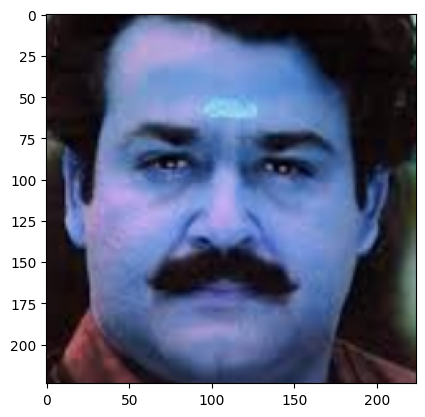

In [22]:
result = modelv.predict([image("/content/drive/MyDrive/dataset/mohanlal/mohanlal100.png")])
if result[0][0] == 1:
    prediction = 'mohanlal'
elif result[0][0] == 0:
    prediction = 'mammooty'
else:
    prediction = 'I dont know this guy!'
print(prediction)
print(result)
#print(path)

In [ ]:
scores = modelv.evaluate(X,Y,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
#to know accuracy of model

Accuracy: 70.12%
